<a href="https://colab.research.google.com/github/mohammadreza-mohammadi94/Application_Deployed_Streamlit/blob/master/Clustering_Darsman/V67_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libs

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

In [28]:
import warnings
warnings.filterwarnings("ignore")

In [41]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/driver-data.csv", index_col='id')
df.head()

,mean_dist_day,mean_over_speed_perc
id,,
3423311935,71.24,28
3423313212,52.53,25
3423313724,64.54,27
3423311373,55.69,22
3423310999,54.58,25


In [42]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 3423311935 to 3423311533
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mean_dist_day         4000 non-null   float64
 1   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 93.8 KB


## WCSS

In [43]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
wcss

[12184626.129627967,
 1316420.8509477214,
 992634.0606702506,
 719601.1096991906,
 534812.0408006302,
 372841.75378276623,
 320185.8682971587,
 276876.20957565017,
 252722.34358893122,
 230812.44051235367]

## Elbow

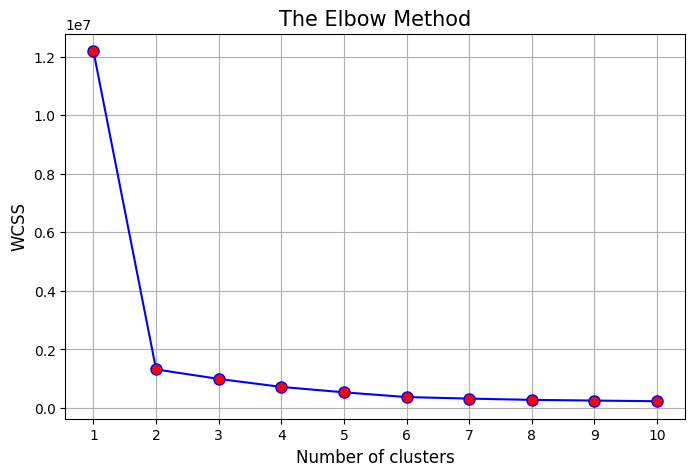

In [44]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b', markersize=8, markerfacecolor='r')
plt.title('The Elbow Method', fontsize=15)
plt.xlabel('Number of clusters', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


## KMeans

In [45]:
k=2
kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df)

In [46]:
kmeans.cluster_centers_

array([[ 50.04763437,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [47]:
# Predicted Lables
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

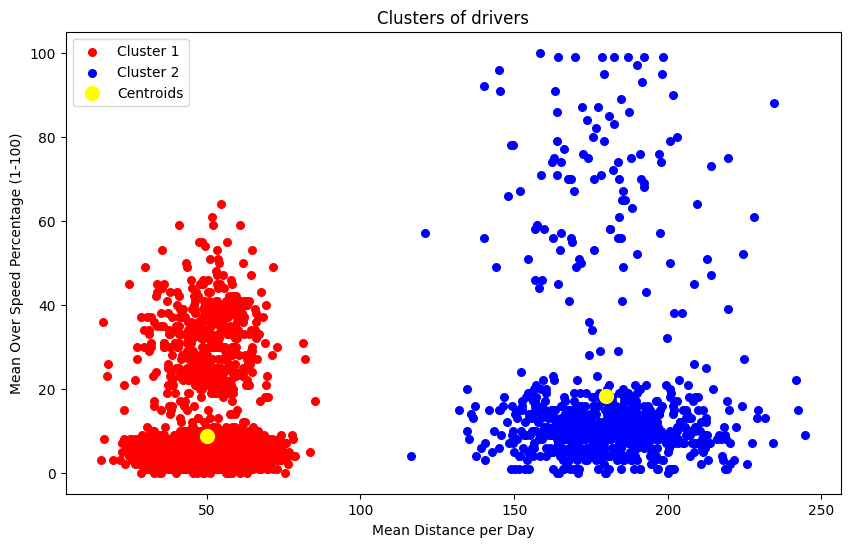

In [48]:
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'magenta', 'cyan', 'black', 'purple', 'orange', 'brown']
for i in range(k):
    plt.scatter(df.values[y_kmeans == i, 0], df.values[y_kmeans == i, 1], s=30, c=colors[i], label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.title('Clusters of drivers')
plt.xlabel('Mean Distance per Day')
plt.ylabel('Mean Over Speed Percentage (1-100)')
plt.legend()
plt.show()

## Model Evaluation

In [49]:
inertia = kmeans.inertia_                                                   # (0 ... inf)
print(f'Inertia: {inertia}')

Inertia: 1316420.8509477214


In [50]:
sil_score = silhouette_score(df, y_kmeans)                        # (-1 ... +1)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.8490223286225532


## Predicting Unseen Data

In [51]:
new_sample1 = np.array([[65,	80]])
pred_cluster1 = kmeans.predict(new_sample1)
print(f"new sample1 belongs to cluster: {pred_cluster1}")

new_sample2 = np.array([[165,	80]])
pred_cluster2 = kmeans.predict(new_sample2)
print(f"new sample2 belongs to cluster: {pred_cluster2}")

new_sample3 = np.array([[55,	18]])
pred_cluster3 = kmeans.predict(new_sample3)
print(f"new sample3 belongs to cluster: {pred_cluster3}")

new sample1 belongs to cluster: [0]
new sample2 belongs to cluster: [1]
new sample3 belongs to cluster: [0]
